In [1]:
from astropy import units as u
from mw_plot import MWSkyMap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime

In [2]:
cwd = os.getcwd() #folder to save file

today = datetime.now().strftime("%Y%m%d") #to date the saved file

In [3]:
HMXB_table = pd.read_csv('HMXB_practice_analysis.csv')
HMXB_table

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,...,SpType,Mod_SpType,SpColor,Mass_compact,M_compact_lower,M_compact_upper,Mass_companion,M_companion_lower,M_companion_upper,Name
0,168450545792009600,58.846151,0.029554,31.045836,0.020792,-1.282117,0.053074,-1.869091,0.030308,1.627403,...,B0Ve,xkcd:purple,xkcd:green,NaN,NaN,NaN,NaN,NaN,NaN,4U 0352+309
1,184497471323752064,80.646805,0.025398,37.675993,0.019576,1.304945,0.040826,-3.999479,0.028049,0.721370,...,B0 IVpe,xkcd:purple,xkcd:green,NaN,NaN,NaN,NaN,NaN,NaN,HD 34921
2,252878401557369088,70.247207,0.011906,44.530344,0.008386,0.100646,0.016362,-1.186128,0.013659,0.378823,...,B0e,xkcd:green,xkcd:green,NaN,NaN,NaN,NaN,NaN,NaN,BSD 24-491
3,276644757710014976,64.925561,0.012604,55.999361,0.008108,-0.473561,0.018277,-0.509666,0.013493,0.210088,...,B1/2I[e],xkcd:green,xkcd:green,NaN,NaN,NaN,NaN,NaN,NaN,XTE J0421+560
4,414196617287885312,18.996041,0.010983,59.153945,0.012780,-2.462583,0.014894,-0.546486,0.016773,0.339193,...,B1-2 III/Ve,xkcd:green,xkcd:green,NaN,NaN,NaN,NaN,NaN,NaN,TYC 3681-695-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,6053076566300433920,183.311569,0.012357,-64.875133,0.015193,-5.953057,0.015886,0.449630,0.020753,0.264487,...,B5V,xkcd:red,xkcd:red,NaN,NaN,NaN,2.869978,2.779767,2.921405,1ES 1210-64.6
117,6054569565614460800,186.656451,0.012048,-62.770359,0.013341,-5.226857,0.015758,-2.070785,0.018766,0.250621,...,B1 Ia+,xkcd:red,xkcd:red,NaN,NaN,NaN,NaN,NaN,NaN,3U 1223-62
118,6054778507172454912,188.502102,0.045905,-61.717619,0.046308,-5.117225,0.056037,0.998133,0.059728,0.013985,...,NaN,xkcd:grey,xkcd:grey,NaN,NaN,NaN,NaN,NaN,NaN,IGR J12341-6143
119,6055103928246312960,190.709317,0.052881,-63.058642,0.054452,-12.857202,0.069594,-3.677077,0.074047,2.282573,...,B0.5IVpe,xkcd:purple,xkcd:green,NaN,NaN,NaN,NaN,NaN,NaN,HD 110432


In [4]:
#include cygnus x-1
cygnus = HMXB_table[HMXB_table['Name'] == 'Cyg X-1']
cygnus

,source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,...,SpType,Mod_SpType,SpColor,Mass_compact,M_compact_lower,M_compact_upper,Mass_companion,M_companion_lower,M_companion_upper,Name
25,2059383668236814720,299.590295,0.010938,35.201579,0.013003,-3.812385,0.014574,-6.309893,0.017453,0.443902,...,O9.7Iabpvar,xkcd:blue,xkcd:blue,21.2,19.0,23.4,NaN,NaN,NaN,Cyg X-1


In [5]:
ra = HMXB_table['ra'].to_list()
dec = HMXB_table['dec'].to_list()
color = HMXB_table['SpColor'].to_list()

#same for cygnus
cyg_ra = cygnus['ra'].to_list()
cyg_dec = cygnus['dec'].to_list()
cyg_color = 'xkcd:light blue' #im choosing a different one for this
cyg_size = 50 # 30 solar mass for optical counterpart

Text(0.5, 0, 'Galactic Longitude (deg)')

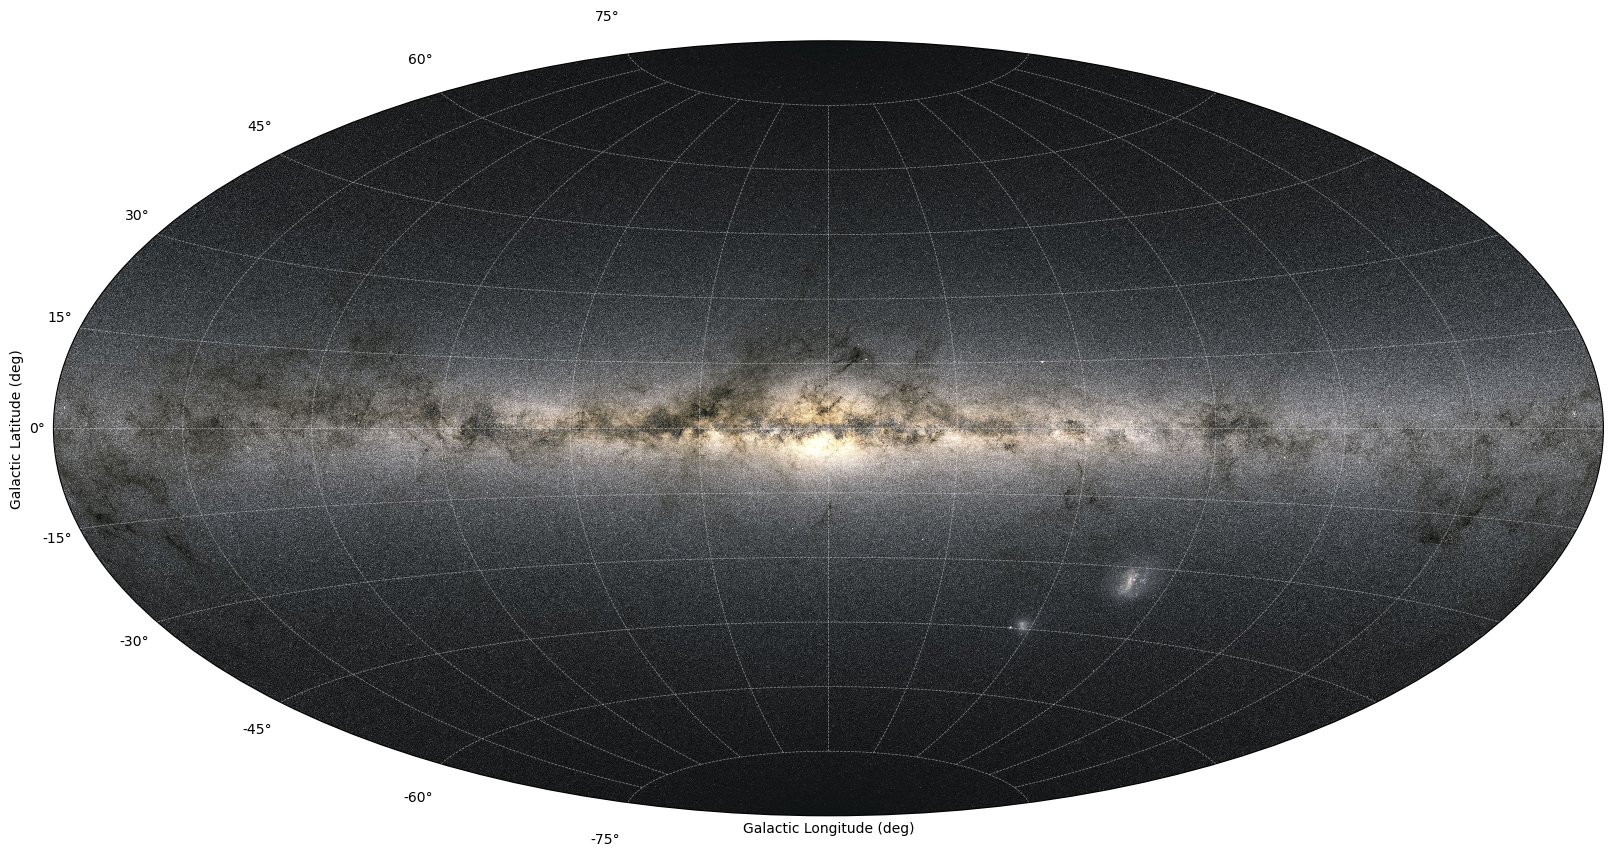

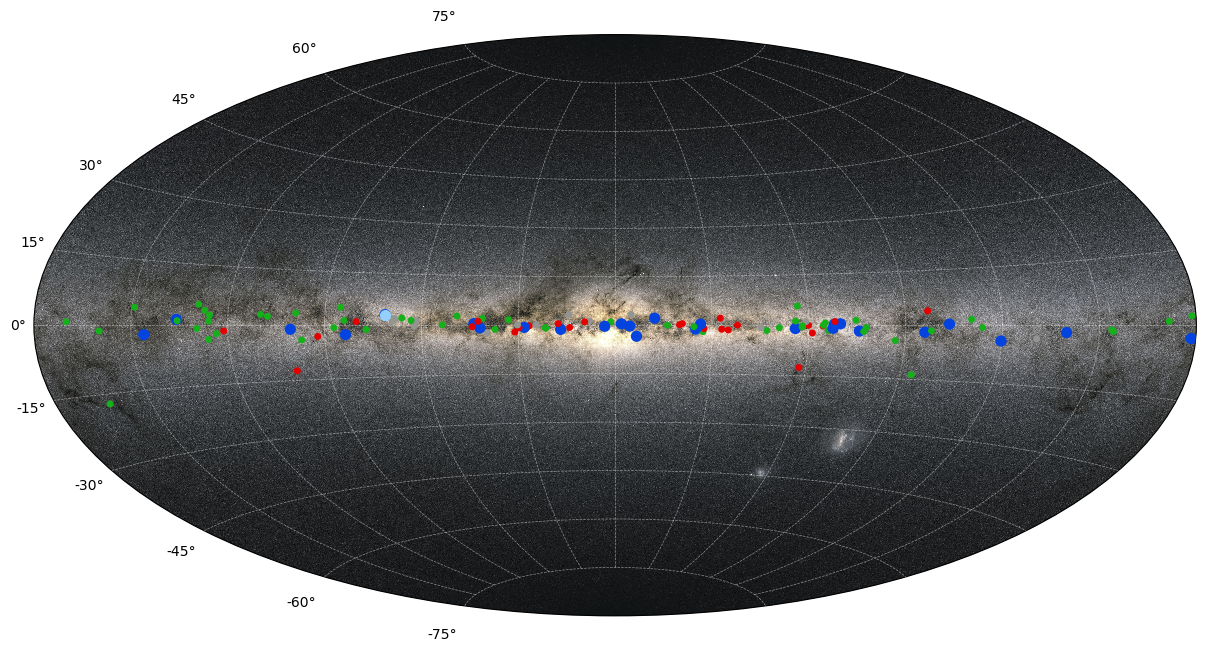

In [6]:
mw1 = MWSkyMap(projection="aitoff", grayscale=False,figsize=(15,10),grid='galactic')
mw1.title = ''

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(111, projection="aitoff")

size = [50 if c =='xkcd:blue' else 16 for c in color]
mw1.scatter(ra * u.degree, dec * u.degree, c=color, s=size)
#plot cygnus x-1
mw1.scatter(cyg_ra *u.degree,cyg_dec*u.degree,c=cyg_color,s=cyg_size)
mw1.transform(ax1)

ax1.scatter(ra, dec,color='r',s=3)
ax1.set_ylabel(r'Galactic Latitude (deg)')
ax1.set_xlabel(r"Galactic Longitude (deg)")

#ax1.scatter(ra, dec,color='r',s=3)



# Plot the Galactic Height 

The height is simply given by 
$$
z = d \cdot sin(b)
$$
Where d is the distance from the source to our sun. and b is the galactic latitude in radians. My distance is in Kiloparsecs so to get it in units parsecs, the height is multiplied by 1000. I am also ploting sources with reasonable distances, those who's parallax (1/distance) over parallax error is greater than 5.0.

$$
 \frac{\omega}{\sigma_\omega} >= 5.0
$$

In [7]:
z = HMXB_table['distance']*np.sin(np.radians(HMXB_table['b']))
cyg_z = cygnus['distance']*np.sin(np.radians(cygnus['b']))

# Calculate the orbital Seperation between the black hole and OB supergiant

[1]Jiang, J., “Fifty Years After the Discovery of the First Stellar-Mass Black Hole: A Review of Cyg X-1”, <i>arXiv e-prints</i>, Art. no. arXiv:2411.12507, 2024. doi:10.48550/arXiv.2411.12507.
.


$$
a^3 = \frac{G \cdot (M_1 + M_2) \cdot P^2}{4 \pi^2}
 $$
$$
a^3 = \frac{6.67 \cdot 10^{-11} N * M^2/kg^2 \cdot (61 * 2\cdot 10^{30}kg) \cdot 483840s^2}{4 \pi^2}
$$
- a - seperation 
- M - Mass of black hole (21 $M_\odot$) and supergiant (40 $M_\odot$)
- P - Period 5.6 days = 483840 s
- G - newton's gravitational constant

$$ a = 3.63 \cdot 10^{10} m \approx0.24 AU$$

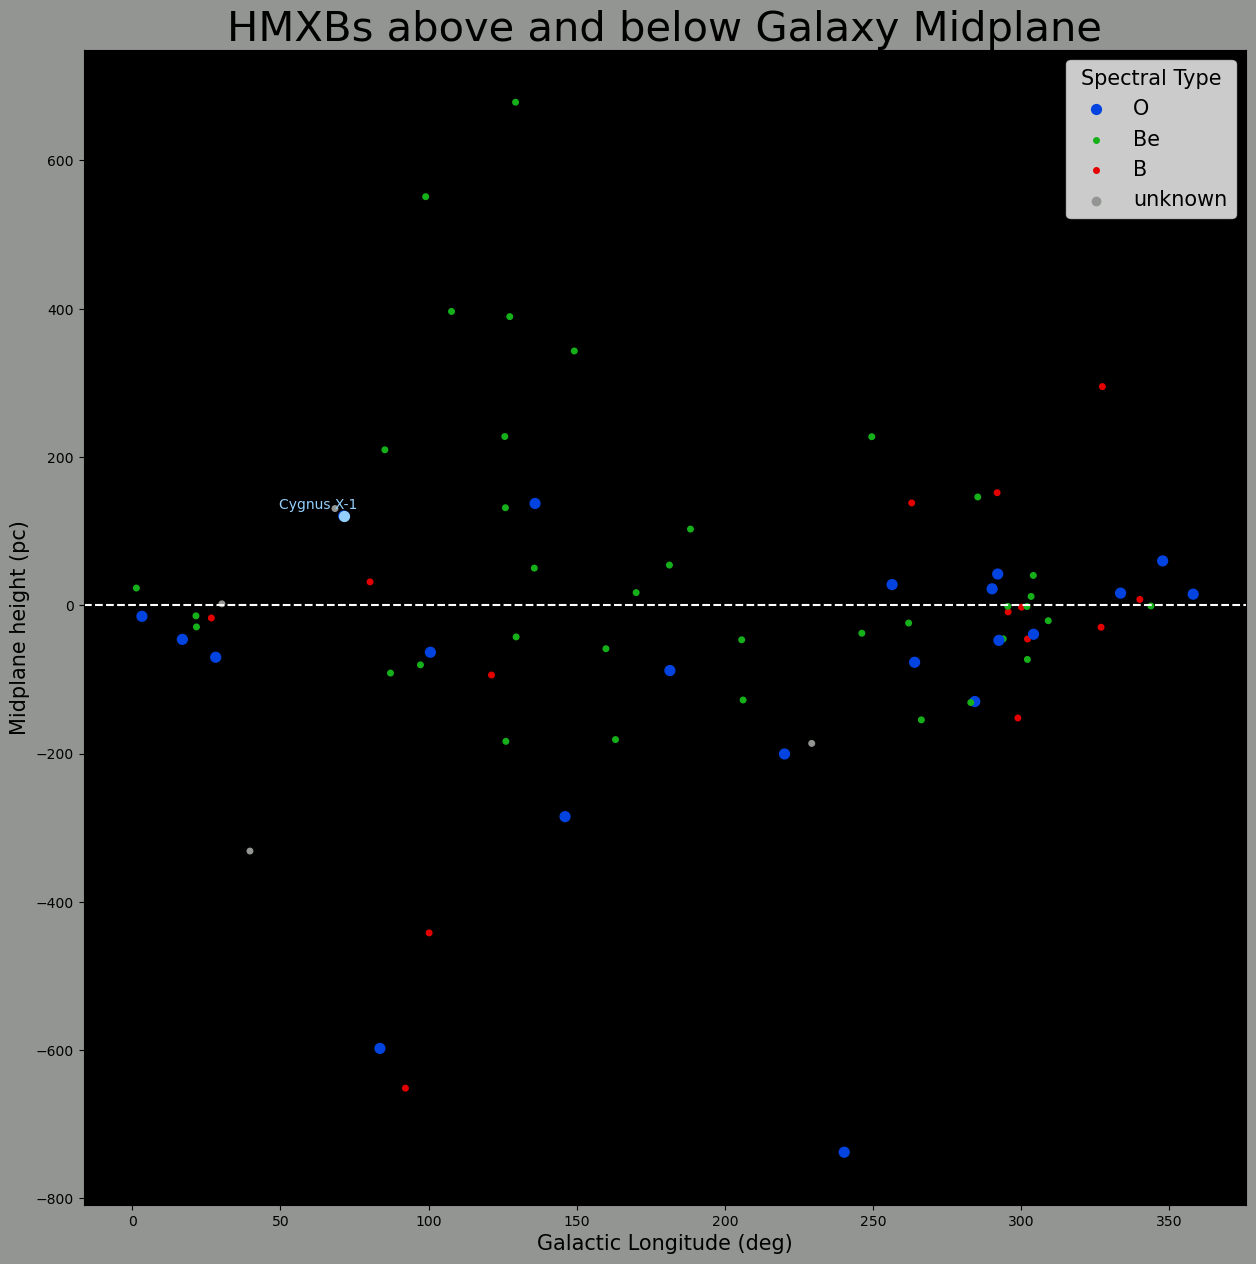

In [9]:
def plot_height(table):
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask]
    dist = table['distance']
    long = table['l']
    lat = table['b']

    height = dist*np.sin(np.radians(lat))
    
    
    color = table['SpColor']
    fig = plt.figure(figsize=(15,15),facecolor='xkcd:grey')
    ax = fig.add_subplot(111)
    #set the graph color
    ax.set_facecolor('xkcd:black')
    size = [50 if c =='xkcd:blue' else 16 for c in color]
    plt.scatter(long,height*1000,c=color,s=size) # times 1000 for units parsec

    #plot cygnus x-1
    plt.scatter(cygnus['l'],cyg_z*1000,c=cyg_color,s=cyg_size)
    #label cygnus X-1
    plt.text(cygnus['l']-22,(cyg_z*1000)+10, s='Cygnus X-1',color='xkcd:light blue')

    #for legend plotting, plot some fake points
    plt.scatter([], [], color='xkcd:blue', label='O',s=50)
    plt.scatter([], [], color='xkcd:green', label='Be',s=16)
    plt.scatter([], [], color='xkcd:red', label='B',s=16)
    plt.scatter([], [], color='xkcd:grey', label='unknown')

    fontsize= 15
    plt.legend(title='Spectral Type',loc='upper right',fontsize=fontsize,title_fontsize=fontsize,facecolor='white')
    plt.axhline(y=0, color= 'xkcd:white',linestyle='--')
    plt.xlabel('Galactic Longitude (deg)',fontsize=fontsize)
    plt.ylabel('Midplane height (pc)',fontsize=fontsize)
    plt.title("HMXBs above and below Galaxy Midplane",fontsize=2*fontsize)

    #save in parent directory
    home_files = os.path.dirname(cwd)
    home_files = home_files + '/'
    #optional
    #plt.savefig(home_files+"Data Management Course/"+f"height_{today}.png",bbox_inches='tight')
    plt.show()
    return None
plot_height(HMXB_table)